## A short remark about the blocking method

In this lecture the blocking method is not as essential as it will be in the context of Metropolis Monte Carlo algorithms. Indeed here every step is truly independent from the others. If every step is a random variable ${\Bigl\{x_i}\Bigr\} ^M_{i=1}$, it is easy to verify that the Central Limit Theorem hypothesis are satisfied. The theorem allows us to estimate statistical uncertainties using the standard deviation of the mean: $$\frac{\sigma}{\sqrt{M-1}} \simeq \sqrt{\frac{1}{M-1} \left[ \frac{1}{M} \sum_{i=1}^M x^2_i - \left( \frac{1}{M} \sum_{i=1}^M x_i \right)^2 \right]} $$ In the context of Metropolis Monte Carlo algorithms different steps are not independent one from the other. We will solve this problem by dividing the M steps in N blocks large enough. In this way the block averages will be statistically independent and identically distributed. The central limit theorem will hold using as random variables the partial sums over the blocks: $A_i=\frac{N}{M} \sum_{j=(i-1) \frac{M}{N}}^{i \frac{M}{N}} x_j$. 

We show below that estimating uncertainties through the blocking method is the same as estimating them without dividing the M Monte Carlo steps in N blocks in the case of truly statistically independent random variables (as it is the case in the following exercises). The central limit theorem says that given $n$ statistically independent and identically distributed random variables ${\Bigl\{y_i}\Bigr\} ^n_{i=1}$ with mean $\mu$ and variance $\sigma ^2$ the sum variable $S_n = \frac{1}{n} \sum_{i=1}^n y_i $ always obeys a Gaussian distribution in the large $n$ limit, with mean $\mu$ and variance $ \sigma ^2 _{S_n} = \frac{\sigma ^2}{n} $. It is easy to see that the mean remains the same if we consider ${\Bigl\{x_i}\Bigr\} ^M_{i=1}$ or ${\Bigl\{A_i}\Bigr\} ^N_{i=1}$ as the set of random variables: $$ \langle A_i \rangle = \frac{1}{N} \sum_{i=1}^N A_i = \frac{1}{M} \sum_{i=1}^M x_i = \langle x_i \rangle  $$
We can verify that also the variance remains the same: $$ \sigma ^2 _{S_N} = \frac{\sigma ^2 _A}{N} = \frac{\sigma ^2}{N} \frac{N}{M} = \frac{\sigma ^2}{M} = \sigma ^2 _{S_M} $$ where we assumed that the central limit theorem holds also for the sum variable A.


# Exercise 01.1

The integral $\langle x \rangle = \int_0^1 x dx = 1/2$ is estimated via a simple Monte Carlo quadrature. We throw a uniform random variable in $[0,1]$ M times and estimate the integral as follows: $$ I=\lim_{n\to \infty} {\frac{1}{n} \sum_{i=1}^n f(x_i)} = \langle f \rangle _{[0,1]} \simeq \frac{1}{M} \sum_{i=1}^M f(x_i)$$
In the following we perform a MC quadrature with $M=10^6$ steps divided in $N=10^2$ blocks.

This is the picture of the estimation of $\langle x \rangle$ with its uncertainty (calculated as the standard deviation of the mean) as a function of the number of blocks.

In [78]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

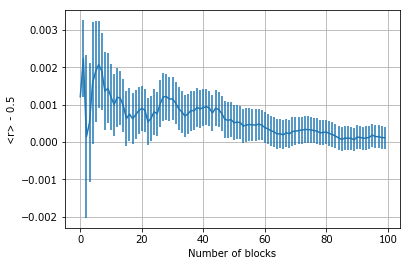

In [79]:
x, f, error = np.loadtxt("Ex_01.1/Plot_1.txt", usecols=(0,1,2), delimiter='\t', unpack='true')
plt.errorbar(x,f,yerr=error)
plt.xlabel('Number of blocks')
plt.ylabel('<r> - 0.5')
plt.grid(True)

plt.show()

In the very same way we can estimate the standard deviation $\sigma^2 = \int_0^1 (x-1/2)^2 dx = 1/12$.This is the picture of the estimation of $\sigma ^2$ with its uncertainty as a function of the number of blocks.

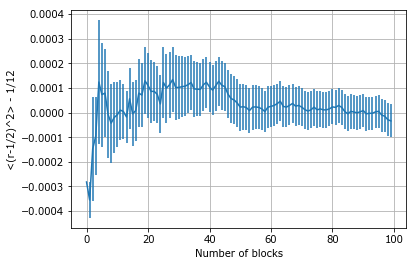

In [80]:
x, f, error = np.loadtxt("Ex_01.1/Plot_2.txt", usecols=(0,1,2), delimiter='\t', unpack='true')
plt.errorbar(x,f,yerr=error)
plt.xlabel('Number of blocks')
plt.ylabel('<(r-1/2)^2> - 1/12')
plt.grid(True)

plt.show()

In both cases we see that our estimation of the integrals is good: errorbars intersect the $y=0$ axis meaning that the expected value and our estimation are compatible.

Random numbers are not truly random because they come from a deterministic algorithm. We can perform a $ \chi ^2$ test to quantify the probability that our random numbers are not drawn from a uniform distribution. 
We divided $[0,1]$ in $M=10^2$ sub-intervals: after $n=10^4$ throws the number of expected events in each sub-interval is $\frac {n}{M} = 100$ if the random variables are thrown according to a uniform distribution. We can calculate $$\chi^2 = \sum_{i=1}^M \frac{\left( n_i - n/M \right)^2}{n/M}$$Let's do this for 100 times and plot $ \chi ^2 _j$ for $j=1,...,100$. If $ \chi ^2 \simeq 100$ our hypothesis of uniform random numbers is verified.

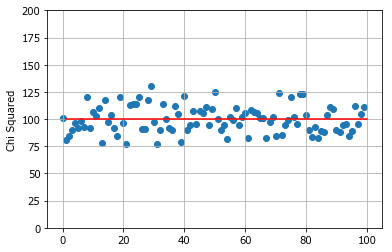

In [81]:
x, f = np.loadtxt("Ex_01.1/Plot_Chi.txt", usecols=(0,1), delimiter='\t', unpack=True)
plt.scatter(x,f)
plt.ylabel('Chi Squared')
plt.grid(True)
plt.ylim((0,200))

plt.plot([1, 50, 100], [100, 100, 100], 'r')  #baseline

plt.show()

# Exercise 01.2

Our pseudo-random number generator is able to sample a uniform distribution. We use the method of the inversion of the cumulative function in order to sample different distributions starting from the ability of sampling only uniform distributions. If $y$ is a uniform random variable in $[0,1]$:
- $x=-\frac{1}{\lambda}ln(1-y)$ obeys a generic exponential distribution $p(x) = \lambda \exp(-\lambda x)$
- $x=\Gamma tan[\pi(y-\frac{1}{2})]$ obeys a generic Cauchy-Lorentz distribution $p(x)=\frac{1}{\pi}\frac{\Gamma}{(x-\mu)^2+\Gamma^2}$



Let's make $10^4$ realizations of $S_N = \frac{1}{N}\sum_{i=1}^N x_i$ (for $N=1, 2, 10, 100$), being $x_i$ a random variable sampled throwing a *standard* dice, an *exponential* dice and a *Lorentzian* dice. Then we fill histograms with the realizations of $S_N$.

**Standard Dice**

Fit parameters:
a =  1381.6799541177909
mu =  0.49972134109034894
sigma =  -0.02883648689613048


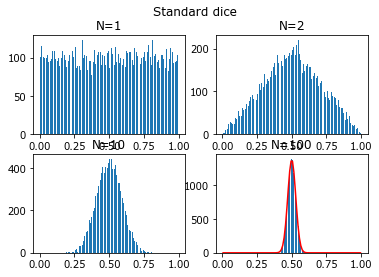

In [82]:
from scipy.optimize import curve_fit

def gauss(x, a, mu, sigma):
    return a*np.exp(-(x-mu)**2/(2*sigma**2))

x1, y1 = np.loadtxt("Ex_01.2/histo_N=1.txt", usecols=(1,2), delimiter='\t', unpack='true')
x2, y2 = np.loadtxt("Ex_01.2/histo_N=2.txt", usecols=(1,2), delimiter='\t', unpack='true')
x3, y3 = np.loadtxt("Ex_01.2/histo_N=10.txt", usecols=(1,2), delimiter='\t', unpack='true')
x4, y4 = np.loadtxt("Ex_01.2/histo_N=100.txt", usecols=(1,2), delimiter='\t', unpack='true')

p_opt, p_cov = curve_fit(gauss, x4, y4)
y_fit = gauss(x4,p_opt[0],p_opt[1],p_opt[2])

f, axarr = plt.subplots(2,2)

axarr[0, 0].bar(x1, y1, width=0.007)
axarr[0, 0].set_title('N=1')
axarr[0, 1].bar(x2, y2, width=0.007)
axarr[0, 1].set_title('N=2')
axarr[1, 0].bar(x3, y3, width=0.007)
axarr[1, 0].set_title('N=10')
axarr[1, 1].bar(x4, y4, width=0.007)
axarr[1, 1].plot(x4,y_fit, label='fit', color='r') # plotting fitted function
axarr[1, 1].set_title('N=100')

print('Fit parameters:')
print('a = ', p_opt[0])
print('mu = ', p_opt[1])
print('sigma = ', p_opt[2])

f.suptitle('Standard dice')

plt.show()

**Exponential Dice**

Fit parameters:
a =  2351.949334506457
mu =  0.996336426376765
sigma =  0.10137450135191164


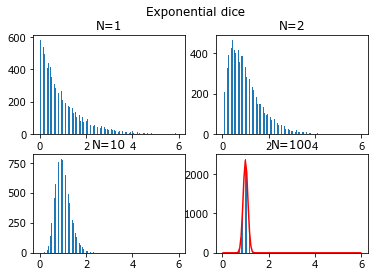

In [83]:
x1, y1 = np.loadtxt("Ex_01.2/histo_N=1.txt", usecols=(3,4), delimiter='\t', unpack='true')
x2, y2 = np.loadtxt("Ex_01.2/histo_N=2.txt", usecols=(3,4), delimiter='\t', unpack='true')
x3, y3 = np.loadtxt("Ex_01.2/histo_N=10.txt", usecols=(3,4), delimiter='\t', unpack='true')
x4, y4 = np.loadtxt("Ex_01.2/histo_N=100.txt", usecols=(3,4), delimiter='\t', unpack='true')

p_opt, p_cov = curve_fit(gauss, x4, y4)
y_fit = gauss(x4,p_opt[0],p_opt[1],p_opt[2])

f, axarr = plt.subplots(2,2)

axarr[0, 0].bar(x1, y1, width=0.03)
axarr[0, 0].set_title('N=1')
axarr[0, 1].bar(x2, y2, width=0.03)
axarr[0, 1].set_title('N=2')
axarr[1, 0].bar(x3, y3, width=0.03)
axarr[1, 0].set_title('N=10')
axarr[1, 1].bar(x4, y4, width=0.03)
axarr[1, 1].plot(x4,y_fit, label='fit', color='r') # plotting fitted function
axarr[1, 1].set_title('N=100')

print('Fit parameters:')
print('a = ', p_opt[0])
print('mu = ', p_opt[1])
print('sigma = ', p_opt[2])

f.suptitle('Exponential dice')

plt.show()

**Lorentzian Dice**

Fit parameters:
a =  3193.816336942537
gamma =  1.061714314980595
mu =  -0.021958316552461724


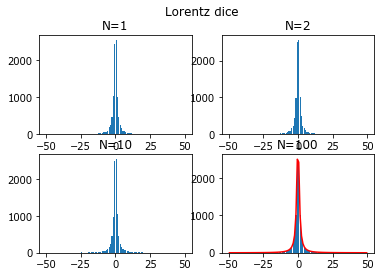

In [84]:
def lorentz(x,a,gamma,mu):
    return a*gamma/((x-mu)**2+gamma**2)

x1, y1 = np.loadtxt("Ex_01.2/histo_N=1.txt", usecols=(5,6), delimiter='\t', unpack='true')
x2, y2 = np.loadtxt("Ex_01.2/histo_N=2.txt", usecols=(5,6), delimiter='\t', unpack='true')
x3, y3 = np.loadtxt("Ex_01.2/histo_N=10.txt", usecols=(5,6), delimiter='\t', unpack='true')
x4, y4 = np.loadtxt("Ex_01.2/histo_N=100.txt", usecols=(5,6), delimiter='\t', unpack='true')

p_opt, p_cov = curve_fit(lorentz, x4, y4)
y_fit = lorentz(x4,p_opt[0],p_opt[1],p_opt[2])

f, axarr = plt.subplots(2,2)

axarr[0, 0].bar(x1, y1)
axarr[0, 0].set_title('N=1')
axarr[0, 1].bar(x2, y2)
axarr[0, 1].set_title('N=2')
axarr[1, 0].bar(x3, y3)
axarr[1, 0].set_title('N=10')
axarr[1, 1].bar(x4, y4)
axarr[1, 1].plot(x4,y_fit, label='fit', color='r') # plotting fitted function
axarr[1, 1].set_title('N=100')

print('Fit parameters:')
print('a = ', p_opt[0])
print('gamma = ', p_opt[1])
print('mu = ', p_opt[2])


f.suptitle('Lorentz dice')

plt.show()

Per $N=100$ il grafico non è ben fittato da una gaussiana, bensì da una lorentziana. Infatti la lorentziana è una distribuzione a varianza infinita che non soddisfa il teorema del limite centrale.

# Exercise 01.3

Imagine to have an horizontal plane with a fixed length $S=100$. The plane is crossed by parallel lines characterized by a distance $d=1$. It is easy to prove that if we throw a needle $N_{thr}$ times and we find it crossing one of the lines on the plane $N_{hit}$ times, then we can estimate: $$\pi = \frac{2L}{Pd} = \lim_{N_{thr} \to \infty}\frac{2LN_{thr}}{N_{hit}d}$$ 
where $P$ is the probability that the needle will intersect one of the lines. In my exercise the needle is chosen to be $L=0.8$ long.
The only important thing to consider while choosing the parameters $S, d, L$ is that $d>L$ but not $d \gg L$ otherwise $P \ll 1$.

Given the length L, a needle in 2 dimensions can be described by 3 parameters: the coordinates $(x,y)$ of one extreme and the direction $ \theta \in [0, 2\pi]$. Our problem is invariant along the $x$ axis (same direction as the lines on the plane): we can forget about $x$ coordinate.

Every thrown consist in generating a needle by sampling uniform random variables:
- $y \in [0,S]$
- $ \theta \in [0, 2\pi]$

We can therefore evaluate if the needle intersect one line or not.
There is a little problem: we are trying to estimate $\pi$ but we need it to generate $\theta$. We can overcome this using a simple accept-reject technique. The ratio between the area of a circle and the corresponding circumscribed square is exactly $\pi$. So if we sample two uniform random numbers $x \in [-1,1]$ and $y \in [0,1]$ and accept only the couples which lies inside the half-circle, $ \theta = arcos \big( \frac{x}{\sqrt{x^2+y^2}} \big) $ is an angular variable distributed uniformly in $[0,\pi]$. 

In the present simulation we chose to perform $M=10^4$ throws of the needle.
We plot the estimation of $\pi$ and its uncertainty as a function of the number of blocks. 

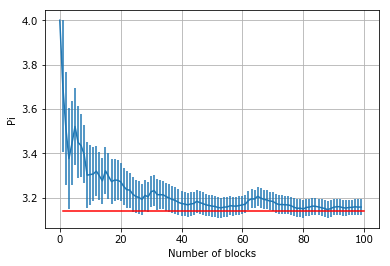

In [85]:
x, f, error = np.loadtxt("Ex_01.3/Plot_1.txt", usecols=(0,1,2), delimiter='\t', unpack='true')
plt.errorbar(x,f,yerr=error)
plt.xlabel('Number of blocks')
plt.ylabel('Pi')
plt.grid(True)

plt.plot([1, 50, 100], [3.1415, 3.1415, 3.1415], 'r')

plt.show()
